# Multivariate Statistics Test 7

**Student**: Aleksandr Jan Smoliakov, VU MIF Data Science MSc year 1  
**Date**: 2024-12-11

## Input data

Data: File `CZILSWE.sav`, variables

* `happy`: how happy are you (0-extremely unhappy, ..., 10-extremely happy)
* `stflife`: how satisfied with life as a whole (0-extremely dissatisfied, ..., 10-extremely satisfied)
* `stfgov`: how satisfied with the national government (0-extremely dissatisfied, ..., 10-extremely satisfied)
* `stfhlth`: state of health services  (0-extremely dissatisfied, ..., 10-extremely satisfied)
* `trstep`: trust in the European Parliament (0-no trust at all, ..., 10-complete trust)
* `trstun`: trust in the United Nations (0-no trust at all, ..., 10-complete trust)
* `trstprt`: trust in political parties (0-no trust at all, ..., 10-complete trust)
* `trstprl`: trust in country's parliament (0-no trust at all, ..., 10-complete trust)
* `trstplc`: trust in police (0-no trust at all, ..., 10-complete trust)
* `trstplt`: trust in politicians (0-no trust at all, ..., 10-complete trust)
* `state`: 1-Czech Republic, 2-Israel, 3-Sweden

Task: construct a SEM model.

First of all, let's load the data and take a look.

In [387]:
import pandas as pd
import pyreadstat
import semopy

pd.options.display.float_format = "{:.4f}".format

In [388]:
df_happy, metadata_happy = pyreadstat.read_sav("data/CZILSWE.sav")

df_happy.describe()

,trstprl,trstplc,trstplt,trstprt,trstep,trstun,stflife,stfgov,stfhlth,happy,state
count,186.0000,186.0000,186.0000,184.0000,153.0000,174.0000,184.0000,180.0000,183.0000,183.0000,187.0000
mean,4.2849,4.9839,3.2957,3.4022,3.8693,4.6782,7.1141,4.0667,5.7377,7.3552,1.9572
std,2.7390,2.6943,2.4147,2.3426,2.6024,2.5894,2.1585,2.4645,2.3198,1.7665,0.8021
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
25%,2.0000,3.0000,1.0000,1.0000,2.0000,3.0000,6.0000,2.0000,4.0000,6.0000,1.0000
50%,4.5000,5.0000,3.0000,4.0000,4.0000,5.0000,8.0000,4.0000,6.0000,8.0000,2.0000
75%,6.7500,7.0000,5.0000,5.0000,6.0000,7.0000,9.0000,6.0000,8.0000,8.0000,3.0000
max,10.0000,10.0000,9.0000,9.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,3.0000


The `state` variable is categorical, so we will need to create dummy variables for it.

There are missing values in the data, but we will not remove them, because the SEM model can handle them.

In [494]:
df_happy["state_israel"] = (df_happy["state"] == 2).astype(int)
df_happy["state_sweden"] = (df_happy["state"] == 3).astype(int)

df_happy.columns = df_happy.columns.str.lower()

df_happy.head()

,trstprl,trstplc,trstplt,trstprt,trstep,trstun,stflife,stfgov,stfhlth,happy,state,state_israel,state_sweden
0,2.0000,2.0000,3.0000,1.0000,0.0000,0.0000,3.0000,10.0000,10.0000,10.0000,3.0000,0,1
1,9.0000,10.0000,7.0000,7.0000,NaN,NaN,10.0000,8.0000,9.0000,10.0000,2.0000,1,0
2,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,10.0000,1.0000,0,0
3,6.0000,8.0000,5.0000,7.0000,NaN,6.0000,9.0000,5.0000,8.0000,10.0000,2.0000,1,0
4,4.0000,3.0000,1.0000,1.0000,4.0000,6.0000,8.0000,2.0000,8.0000,10.0000,2.0000,1,0


## Model

### Model description

We will create a SEM model with the following structure:

Observed variables:

* `trstprt`
* `trstprl`
* `trstplt`
* `trstplc`
* `trstep`
* `trstun`
* `stflife`
* `happy`
* `stfgov`
* `stfhlth`

Latent variables:

* `GovTrust` - trust in the country's government institutions, measured by `trstprt`, `trstprl`, `trstplt`, `trstplc`
* `GlobalTrust` - trust in global institutions, measured by `trstun`, `trstep`
* `LifeSatisfaction` - life satisfaction, measured by `stflife`, `happy`
* `ServiceSatisfaction` - satisfaction with public services, measured by `stfgov`, `stfhlth`

The model will have the following paths:

* `GlobalTrust` -> `LifeSatisfaction`
* `ServiceSatisfaction` -> `GovTrust`

Covariances:

* `trstep` <-> `trstun`
* `trstprt` <-> `trstplt`
* `GovTrust` <-> `GlobalTrust`

In [490]:
model_description = """
    # Latent variables
    GovTrust =~ trstprt + trstprl + trstplt + trstplc
    GlobalTrust =~ trstep + trstun
    LifeSatisfaction =~ stflife + happy
    ServiceSatisfaction =~ stfgov + stfhlth

    # Paths
    LifeSatisfaction ~ GlobalTrust
    GovTrust ~ ServiceSatisfaction

    # Covariances
    trstep ~~ trstun
    trstprt ~~ trstplt
    GovTrust ~~ GlobalTrust
"""

model = semopy.Model(model_description)
res = model.fit(df_happy)

### Diagram of the model

Let's draw a diagram of the model with the estimates.

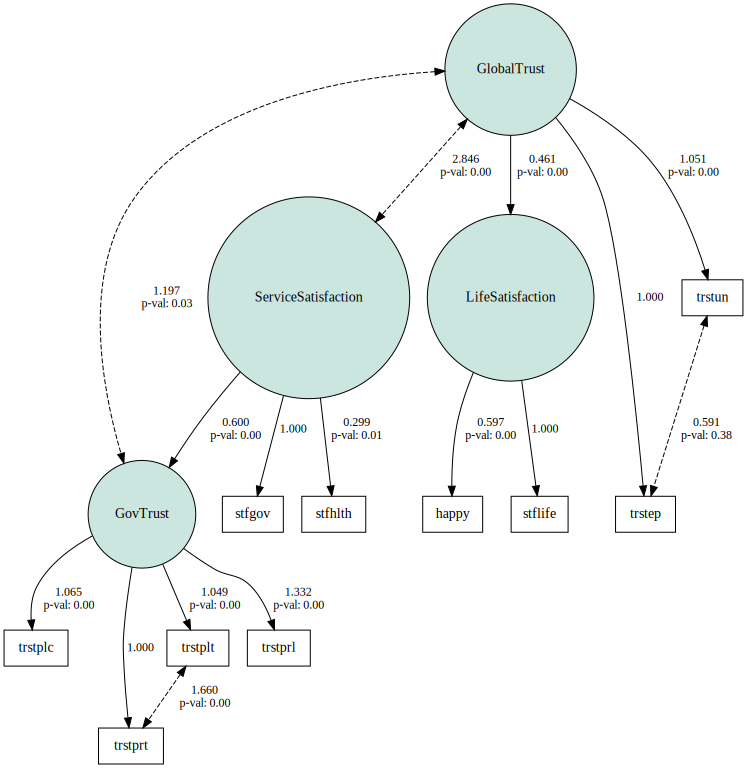

In [491]:
semopy.plot.semplot(
    model,
    "sem_model.png",
    plot_covs=True,
)

We've fit the model. The majority of the paths are significant at the 0.05 level. The only exception is the covariance between `trstep` and `trstun`, which is not significant.

### Model fit characteristics

The model has the following fit characteristics:

In [495]:
fit_indices = semopy.calc_stats(model)

fit_indices

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,29,45,43.5473,0.0405,1098.3351,0.9862,0.9604,0.9385,0.9604,0.9786,0.0519,51.5343,135.5431,0.2329


Everything looks good, we have a good model fit. Notably:

* Degrees of Freedom = 29
* Chi-square = 43.55
* NC = Chi-square / DoF = 1.50 < 2 (good)
* AGFI = 0.939 > 0.90 (acceptable)
* RMSEA = 0.0519 < 0.10 (almost good at 0.05)
* Chi-square p-value = 0.0405 > 0.01 (good)